<a href="https://colab.research.google.com/github/olegsem79/Yolo/blob/main/29_%D0%94%D0%97_Ligth_IMAGE_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пайплайн обработки изображениия на базе модели Yolo

In [ ]:
# проверяем данной командой, что в среде доступна видеокарта
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
!pip install -q ultralytics
!pip install -q supervision
!pip install -q moviepy
!pip install -q ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
# импорт библиотек

import glob
from PIL import Image
import matplotlib.pyplot as plt
import os # импорт библиотеки для работы с операционной системой
import torch # импорт pytorch
import numpy as np # импорт библиотеки numpy для работы с массивами
from ultralytics import YOLOWorld # импорт модели YOLOWorld из библиотеки ultralytics
import cv2 # импорт библиотеки OpenCV для работы с изображениями и видео
import supervision as sv # импорт библиотеки supervision
import clip # импорт модели CLIP
from PIL import Image, ImageOps # импорт классов библиотеки PIL для просмотра изображений
from IPython.display import HTML # импорт класса HTML библиотеки IPython для вывода данных в ячейки ноутбука в формате HTML
from base64 import b64encode # импорт функции b64encode для кодирования видео в кодировку base64
from typing import Union, Optional, List # импорт типов данных из библиотеки typing для создания расширенных аннотаций кода
import moviepy.editor # импорт средства отображения и редактирования видео из библиотеки moviepy
import gc # импорт библиотеки для удаления неиспользуемых переменных и очистки памяти

from tqdm import tqdm

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt


In [6]:
SOURCE_IMAGE_PATH = f"{HOME}/29_street_image_4.jpg"

In [7]:


model = YOLO("yolo11n.pt")
print(f"Модель знает {len(model.names)} классов")
print("Примеры классов:", list(model.names.values()))

Модель знает 80 классов
Примеры классов: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']



image 1/1 /content/29_street_image_4.jpg: 448x640 2 persons, 11 cars, 1 traffic light, 363.2ms
Speed: 13.6ms preprocess, 363.2ms inference, 40.3ms postprocess per image at shape (1, 3, 448, 640)

Модель загружена на: cpu



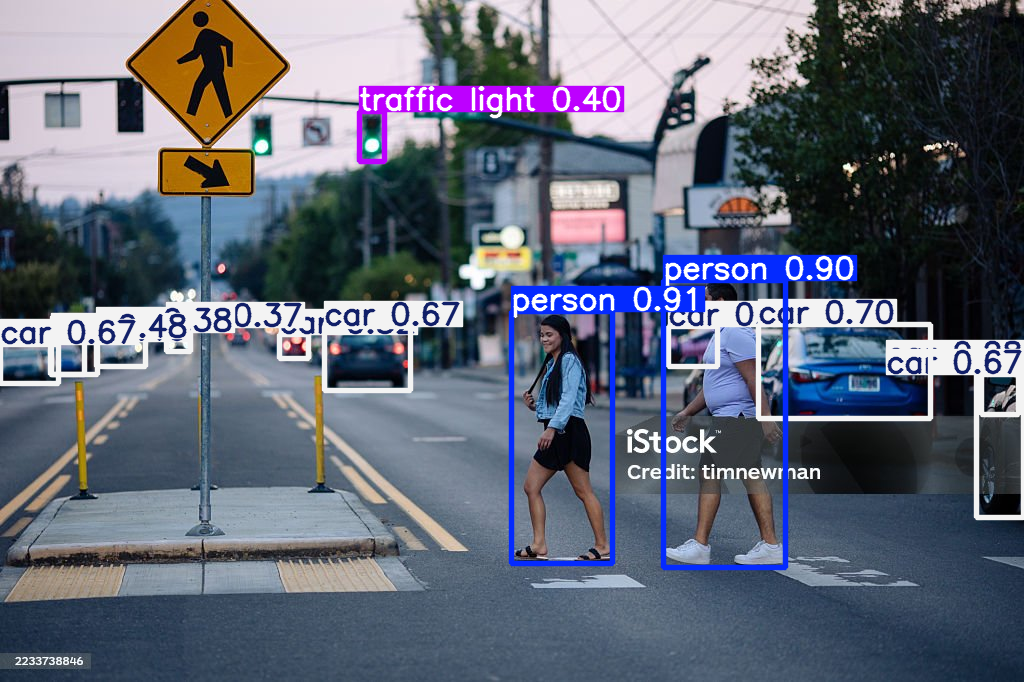

In [8]:
results = model(SOURCE_IMAGE_PATH)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
_ = model.to(device)
# Show results

print("")
print(f"Модель загружена на: {device}")
print("")

results[0].show()

In [ ]:
# Предикт с кастомными параметрами
results = model.predict(SOURCE_IMAGE_PATH,
    conf=0.5,        # Порог уверенности (50%)
    #iou=0.5,         # Порог IoU для NMS
    imgsz=640,       # Размер изображения
    save=True,       # Сохранить результат
    #show=True,       # Показать результат
    verbose=False    # Убрать лишний вывод
)

# Результаты сохранятся в папке runs/detect/predict/

Results saved to /content/runs/detect/predict5



0: 448x640 2 persons, 5 cars, 280.4ms
Speed: 12.1ms preprocess, 280.4ms inference, 3.6ms postprocess per image at shape (1, 3, 448, 640)

Найдено объектов: 7



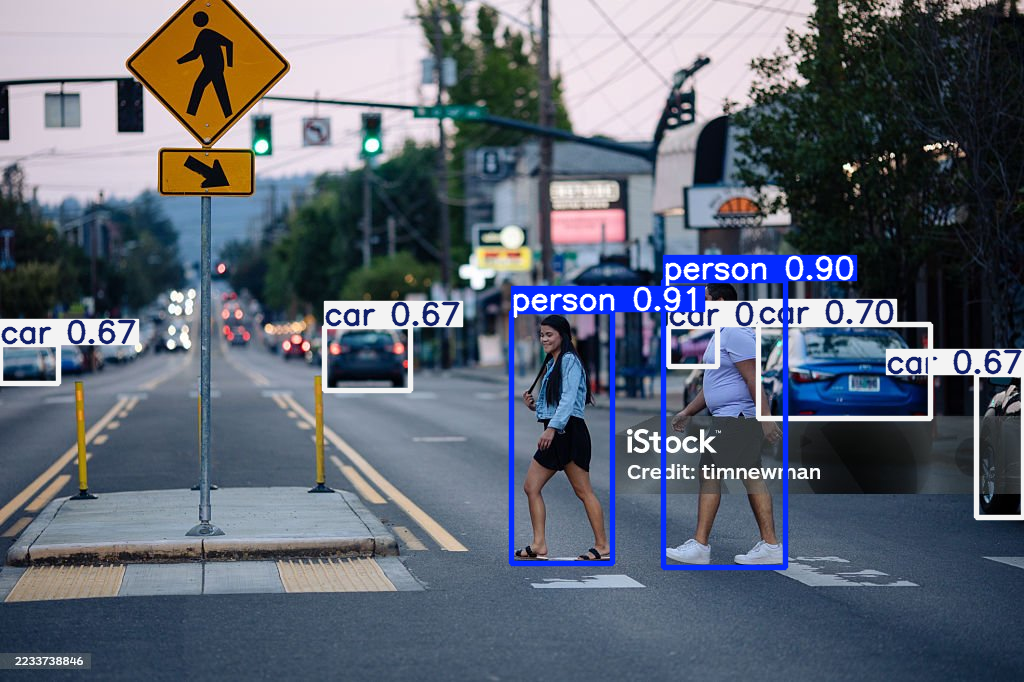

In [ ]:
# через OpenCV CV2

# Только вывод без сохранения

image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.predict(image, conf=0.5)

# Show results
print("")
print(f"Найдено объектов: {len(results[0].boxes)}")
print("")
results[0].show()

# Анализируем результаты
#result = results[0]  # Первый результат (для одного изображения)

#print(f"Классы модели: {result.names}") # Выводит все обученные классы


Найдено объектов: 7

Файл: custom_result.jpg
Размер: 1024x682


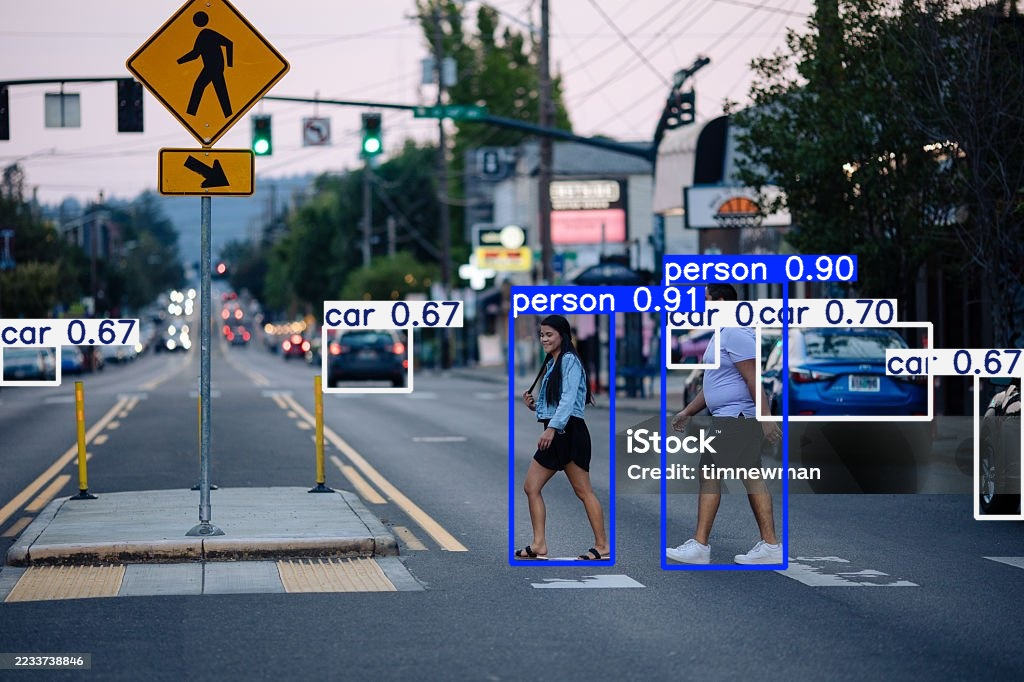

In [ ]:
# через OpenCV CV2

# Сохранение и вывод файла

# Кастомное сохранение
result = results[0]
annotated_image = result.plot()  # Получаем изображение с боксами

# Show results
print("")
print(f"Найдено объектов: {len(results[0].boxes)}")
print("")

# Сохраняем через OpenCV
cv2.imwrite("custom_result.jpg", annotated_image)

from IPython.display import Image, display

# Простое отображение в ноутбуке
#display(Image(filename='custom_result.jpg', width=800))

# Или с дополнительной информацией
print(f"Файл: custom_result.jpg")
print(f"Размер: {annotated_image.shape[1]}x{annotated_image.shape[0]}")
display(Image(filename='custom_result.jpg', width=700))


image 1/1 /content/29_street_image_4.jpg: 448x640 2 persons, 266.4ms
Speed: 4.8ms preprocess, 266.4ms inference, 11.6ms postprocess per image at shape (1, 3, 448, 640)

Найдено объектов: 2

Файл: custom_result.jpg
Размер: 1024x682


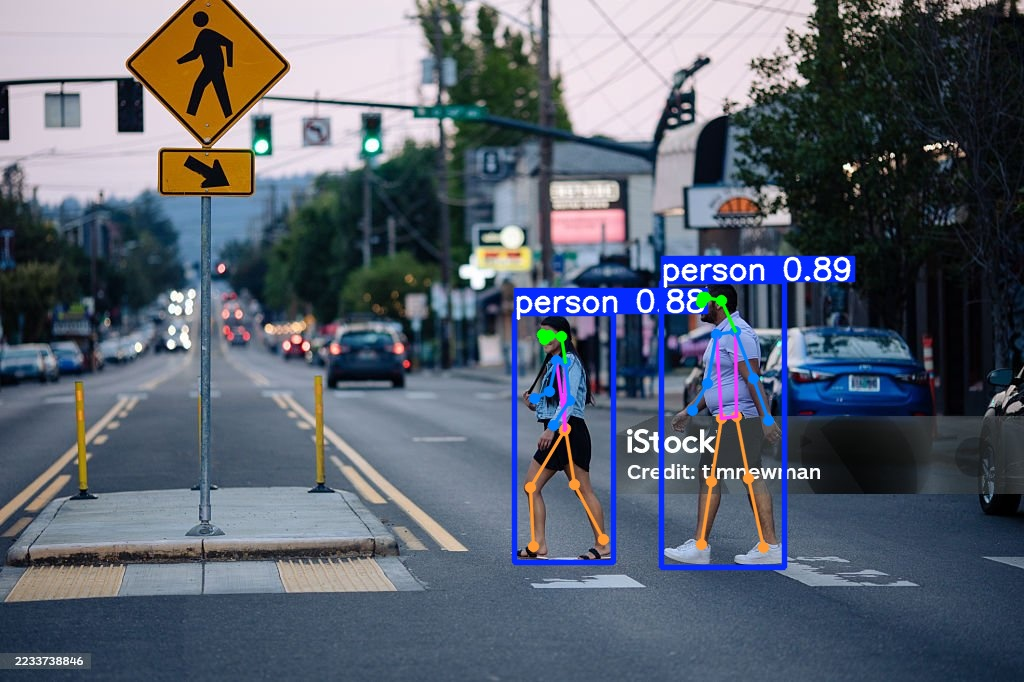

In [ ]:
# Поза

model = YOLO("yolo11n-pose.pt")

results = model(SOURCE_IMAGE_PATH)

# через OpenCV CV2

# Сохранение и вывод файла

# Кастомное сохранение
result = results[0]
annotated_image = result.plot()  # Получаем изображение с боксами

# Show results
print("")
print(f"Найдено объектов: {len(results[0].boxes)}")
print("")

# Сохраняем через OpenCV
cv2.imwrite("custom_result.jpg", annotated_image)

from IPython.display import Image, display

# Простое отображение в ноутбуке
#display(Image(filename='custom_result.jpg', width=800))

# Или с дополнительной информацией
print(f"Файл: custom_result.jpg")
print(f"Размер: {annotated_image.shape[1]}x{annotated_image.shape[0]}")
display(Image(filename='custom_result.jpg', width=700))


image 1/1 /content/29_street_image_4.jpg: 448x640 2 persons, 11 cars, 1 traffic light, 203.9ms
Speed: 4.3ms preprocess, 203.9ms inference, 34.8ms postprocess per image at shape (1, 3, 448, 640)

Найдено объектов: 14

Файл: custom_result.jpg
Размер: 1024x682


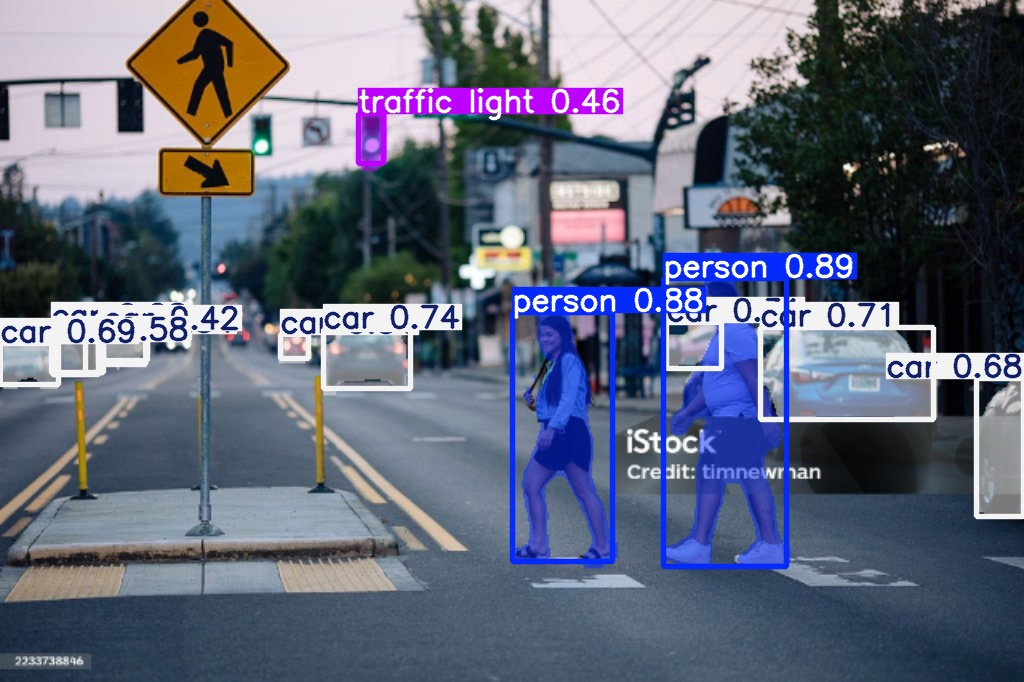

In [ ]:
# Сегментация объекта

model = YOLO("yolo11n-seg.pt")

results = model(SOURCE_IMAGE_PATH)

# через OpenCV CV2

# Сохранение и вывод файла

# Кастомное сохранение
result = results[0]
annotated_image = result.plot()  # Получаем изображение с боксами

# Show results
print("")
print(f"Найдено объектов: {len(results[0].boxes)}")
print("")

# Сохраняем через OpenCV
cv2.imwrite("custom_result.jpg", annotated_image)

from IPython.display import Image, display

# Простое отображение в ноутбуке
#display(Image(filename='custom_result.jpg', width=800))

# Или с дополнительной информацией
print(f"Файл: custom_result.jpg")
print(f"Размер: {annotated_image.shape[1]}x{annotated_image.shape[0]}")
display(Image(filename='custom_result.jpg', width=700))